In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('SaleData.xlsx')
data.head(10)
data.set_index('OrderDate')

XLRDError: Excel xlsx file; not supported

In [ ]:
# data.info()
data.OrderDate.dt.month_name()

In [ ]:
data.head(3)

In [ ]:
data.Region.unique()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.Region.unique()

In [ ]:
data.Manager.unique()

In [ ]:
data.SalesMan.unique()

In [ ]:
data.Item.unique()

In [4]:
region_gp = data.groupby('Region')

NameError: name 'data' is not defined

In [5]:
region_gp.groups

NameError: name 'region_gp' is not defined

In [6]:
region_central = region_gp.get_group('Central')
region_central['Sale_amt'].sum()

NameError: name 'region_gp' is not defined

In [7]:
# data[data.Region =='Central']

In [ ]:
sums = data.groupby('Region')['Sale_amt'].sum()
sums.values

In [ ]:
plt.bar(sums.index,sums.values )

In [ ]:
avg_sales = data.groupby('Region')['Sale_amt'].mean()
avg_sales

In [ ]:
plt.bar(avg_sales.index,avg_sales.values )

In [ ]:
sums = data.groupby('Region')['Sale_amt'].aggregate(['count','max','min','mean','sum'])
sums

In [ ]:
# Top manager on sales amount

top_managers= data.groupby('Manager')['Sale_amt'].sum().sort_values(ascending=False)

In [ ]:
plt.bar(top_managers.index,top_managers.values)

In [ ]:
top_items_sales_amt = data.groupby('Item')['Sale_amt'].sum().sort_values(ascending=False)

In [ ]:
plt.bar(top_items_sales_amt.index,top_items_sales_amt.values)

In [ ]:
data.head(1)

In [ ]:
# Region wise item sale count
# data.groupby('Region')['Item'].count()
data.groupby(['Region','Item'])['Item'].count()

# Time Series  Data

In [ ]:
import datetime
from datetime import datetime

In [ ]:
date = datetime(2014, 12, 15)

In [ ]:
date

In [ ]:
date.year

In [ ]:
date.month

In [ ]:
date.day

In [ ]:
new_date = datetime(2014, 12, 15, 17, 30)

In [ ]:
new_date

In [ ]:
new_date.hour

In [ ]:
new_date.minute

In [ ]:
today = datetime.now()

In [ ]:
today

In [ ]:
today.date()

In [ ]:
today.time()

# Timestamp objects

In [ ]:
pd.Timestamp('2014-11-30')

In [ ]:
pd.Timestamp('2014-12-15 17:30')

In [ ]:
pd.Timestamp('17:30')

In [ ]:
pd.Timestamp("now")

# Timedelta
- A difference between two pandas Timestamp objects is represented by a timedelta
  object, which is a representation of an exact difference in time. 
- These are common as results of determining the duration between two dates or to calculate the date at a
  specific interval of time from another date and/or time.

In [ ]:
today = datetime(2014, 11, 30)
today

In [ ]:
tomorrow = today + pd.Timedelta(days=1)
tomorrow

In [ ]:
nextmonth_today = today + pd.Timedelta(days=30)
nextmonth_today

In [ ]:
date1 = datetime(2023, 9, 10)
date2 = datetime(2023, 9, 1)

date1 - date2

# Introducing time-series data

## DatetimeIndex

In [ ]:
import numpy as np

In [ ]:
series = pd.Series([1,2,3,4], index=["Apple","Bat","Cat","Dog"])
series

In [ ]:
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
dates

In [ ]:
ts = pd.Series([10000, 25000], dates)
ts

In [ ]:
ts.index

In [ ]:
ts.values

In [ ]:
series.index

In [ ]:
series.values

In [ ]:
pd.to_datetime('2023-1-1')

In [ ]:
dti = pd.to_datetime(['Aug 1, 2014','2014-08-02','2014.8.3',None])
dti

In [ ]:
pd.to_datetime(['Aug 1, 2014', 'Augg 1, 2014'],errors='coerce')

In [ ]:
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series
# periods

In [ ]:
date_series['2014-08-05':'2014-08-07']

In [ ]:
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3

In [ ]:
s3['2014-05']

In [ ]:
s3['2014-08':'2014-09']

# Creating time-series data with specific frequencies

In [ ]:
np.random.seed(123456)
bymin = pd.Series(np.random.randn(2160),pd.date_range('2014-08-01','2014-10-29 23:59',freq='H'))

In [ ]:
bymin

In [ ]:
bymin['2014-08-01 00:02':'2014-08-01 00:10']

In [ ]:
days = pd.date_range('2023-08-29', '2023-09-05', freq='B')
days

In [ ]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=10)

In [ ]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

In [ ]:
dti.freq

# Manipulating time-series data

We will now examine several common operations that are performed on time-series
data. 

These operations entail realigning data, changing the frequency of the samples
and their values, and calculating aggregate results on continuously moving subsets
of the data to determine the behavior of the values in the data as time changes. We
will examine each of the following:

• Shifting and lagging values to calculate percentage changes

• Changing the frequency of the data in the time series

• Up and down sampling of the intervals and values in the time series

• Performing rolling-window calculations

## Shifting and lagging

In [ ]:
# create a Series to work with
np.random.seed(123456)
ts = pd.Series([1, 2, 2.5, 1.5, 0.5],pd.date_range('2014-08-01', periods=5))
ts

In [ ]:
# shift forward one day
ts.shift(1)

In [ ]:
# lag two days
ts.shift(-1)

In [ ]:
# calculate daily percentage change
ts / ts.shift(1)

# Up and down resampling

In [ ]:
# calculate a random walk five days long at one second intervals
# these many items will be needed
count = 24 * 60 * 60 * 5

In [ ]:
# create a series of values
np.random.seed(123456)
values = np.random.randn(count)

In [ ]:
ws = pd.Series(values)
ws

In [ ]:
# calculate the walk
walk = ws.cumsum()
walk

In [ ]:
# patch the index
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

In [ ]:
# resample to minute intervals
walk.resample("1Min",how='mean')

# Time-series moving-window operations

In [ ]:
import numpy as np
import pandas as pd

#make this example reproducible
np.random.seed(0)

#create dataset
period = np.arange(1, 101, 1)
leads = np.random.uniform(1, 20, 100)
sales = 60 + 2*period + np.random.normal(loc=0, scale=.5*period, size=100)
df = pd.DataFrame({'period': period, 'leads': leads, 'sales': sales})

#view first 10 rows
df.head(10)

# We can use the following syntax to create a new column that contains the rolling mean of ‘sales’ for the previous 5 periods:



In [ ]:
#find rolling mean of previous 5 sales periods
df['rolling_sales_5'] = df['sales'].rolling(5).mean()

#view first 10 rows
df.head(10)

# We can manually verify that the rolling mean sales displayed for period 5 is the mean of the previous 5 periods:

Rolling mean at period 5: (61.417+64.900+66.698+64.927+73.720)/5 = 66.33

We can use similar syntax to calculate the rolling mean of multiple columns:



In [ ]:
#find rolling mean of previous 5 leads periods 
# df['rolling_leads_5'] = df['leads'].rolling(5).mean() 

#find rolling mean of previous 5 leads periods
df['rolling_sales_5'] = df['sales'].rolling(5).mean()
df['rolling_sales_10'] = df['sales'].rolling(10).mean()
df['rolling_sales_20'] = df['sales'].rolling(20).mean()

#view first 10 rows
df.head(10)

# We can also create a quick line plot using Matplotlib to visualize the raw sales compared to the rolling mean of sales:

import matplotlib.pyplot as plt
plt.plot(df['rolling_sales_5'], label='Rolling Mean')
plt.plot(df['sales'], label='Raw Data')
plt.legend()
plt.ylabel('Sales')
plt.xlabel('Period')
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(df['rolling_sales_5'], label='Rolling Mean') 
plt.plot(df['rolling_sales_10'], label='Rolling Mean')
plt.plot(df['rolling_sales_20'], label='Rolling Mean')
plt.plot(df['sales'], label='Raw Data') 
plt.legend() 
plt.ylabel('Sales') 
plt.xlabel('Period') 
plt.show()

# Creating time-series charts with .plot()

In [ ]:
# generate a random walk time-series
np.random.seed(123)
s = pd.Series(np.random.randn(1096),
index=pd.date_range('2012-01-01','2014-12-31'))
walk_ts = s.cumsum()

In [ ]:
# this plots the walk - just that easy :)
s.plot();

In [ ]:
# this plots the walk - just that easy :)
walk_ts.plot();

In [ ]:

walk_ts.plot(grid=True)

In [ ]:
# # the same plot as plotting the Series it is created from
# walk_df = pd.DataFrame(walk_ts)
# walk_df.plot(grid=True);

In [ ]:
# generate two random walks, one in each of
# two columns in a DataFrame
np.random.seed(0)
df = pd.DataFrame(np.random.randn(1096, 2),
index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

In [ ]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot(title='Title of the Chart')
plt.xlabel('Time')
plt.ylabel('Money')


In [ ]:
# change the legend items to be different
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')
# this sets the legend labels
ax.legend(['1', '2'])

In [ ]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')
# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

In [ ]:
# change the line colors on the plot
# use character code for the first line,
# hex RGB for the second
walk_df.plot(style=['g', '#FF0000']);

In [ ]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted','Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})

# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])

# set the legend
ax.legend(legend_labels, loc='upper left')

# Python | ARIMA Model for Time Series Forecasting

### A Time Series is defined as a series of data points indexed in time order. The time order can be daily, monthly, or even yearly. Given below is an example of a Time Series that illustrates the number of passengers of an airline per month from the year 1949 to 1960.

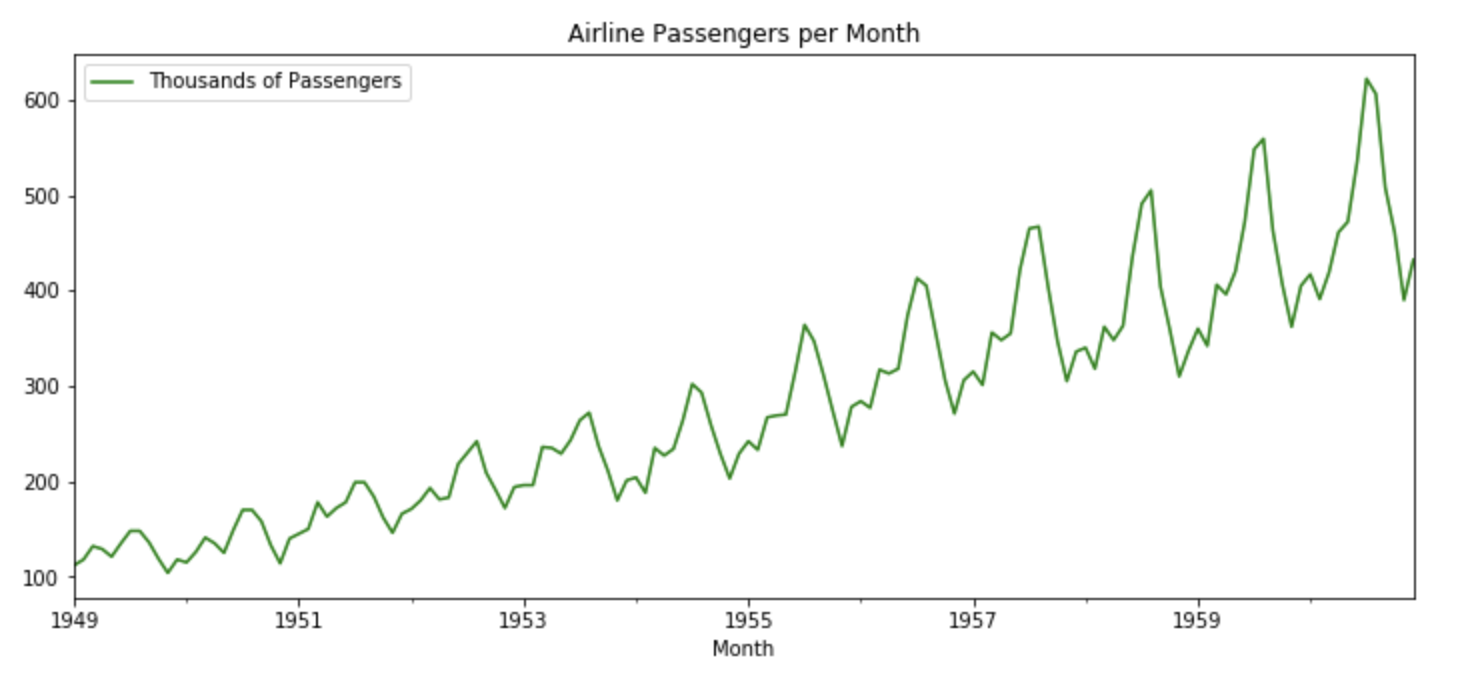

# Time Series Forecasting
Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

- To predict the number of incoming or churning customers.
- To explaining seasonal patterns in sales.
- To detect unusual events and estimate the magnitude of their effect.
- To Estimate the effect of a newly launched product on number of sold units.

# Components of a Time Series:

Trend:

The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

Seasonality:

The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

Cyclical Component: 

These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
Irregular Variation: These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition:

ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.


# What Are the Limitations of Time Series Analysis?
Time series has the below-mentioned limitations; we have to take care of those during our data analysis.

- Similar to other models, the missing values are not supported by TSA
- The data points must be linear in their relationship.
- Data transformations are mandatory, so they are a little expensive.
- Models mostly work on Uni-variate data.

# Data Types of Time Series

Let’s discuss the time series’ data types and their influence. While discussing TS data types, there are two major types – stationary and non-stationary.

- Stationary: A dataset should follow the below thumb rules without having Trend, Seasonality, Cyclical, and Irregularity components of the time series.

- The mean value of them should be completely constant in the data during the analysis.
- The variance should be constant with respect to the time-frame
- Covariance measures the relationship between two variables.
- Non- Stationary: If either the mean-variance or covariance is changing with respect to time, the dataset is called non-stationary.



# Methods to Check Stationarity
During the TSA model preparation workflow, we must assess whether the dataset is stationary or not. This is done using Statistical Tests. There are two tests available to test if the dataset is stationary:

- Augmented Dickey-Fuller (ADF) Test

- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test 

# Augmented Dickey-Fuller (ADF) Test or Unit Root Test
The ADF test is the most popular statistical test. It is done with the following assumptions:

- Null Hypothesis (H0): Series is non-stationary
- Alternate Hypothesis (HA): Series is stationary
    - p-value >0.05 Fail to reject (H0)
    - p-value <= 0.05 Accept (H1)

- Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
        These tests are used for testing a NULL Hypothesis (HO) that will perceive the time series as stationary around a deterministic trend against the alternative of a unit root. Since TSA is looking for Stationary Data for its further analysis, we have to ensure that the dataset is stationary.

# Converting Non-Stationary Into Stationary
Let’s discuss quickly how to convert non-stationary to stationary for effective time series modeling. There are three methods available for this conversion 
- detrending,
- differencing, 
- transformation

# Detrending
It involves removing the trend effects from the given dataset and showing only the differences in values from the trend. It always allows cyclical patterns to be identified.
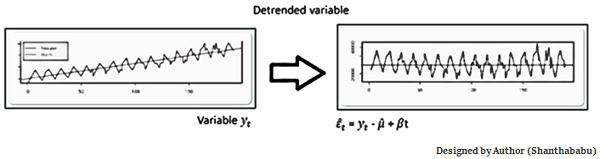

# Differencing
This is a simple transformation of the series into a new time series, which we use to remove the series dependence on time and stabilize the mean of the time series, so trend and seasonality are reduced during this transformation.

Yt= Yt – Yt-1

where
 - Yt=Value with time
 
 

# Transformation
This includes three different methods they are 
- Power Transform, 
- Square Root, 
- and Log Transfer

The most commonly used one is Log Transfer.

# Moving Average Methodology
The commonly used time series method is the Moving Average. This method is slick with random short-term variations. Relatively associated with the components of time series.

## The Moving Average (MA) (or) Rolling Mean:
The value of MA is calculated by taking average data of the time-series within k periods.

Let’s see the types of moving averages:

 - Simple Moving Average (SMA),
 - Cumulative Moving Average (CMA)
 - Exponential Moving Average (EMA)
 
# Simple Moving Average (SMA)
 - The Simple Moving Average (SMA) calculates the unweighted mean of the previous M or N points. We prefer selecting sliding window data points based on the amount of smoothing, as increasing the value of M or N improves smoothing but reduces accuracy.

To understand better, I will use the air temperature dataset.

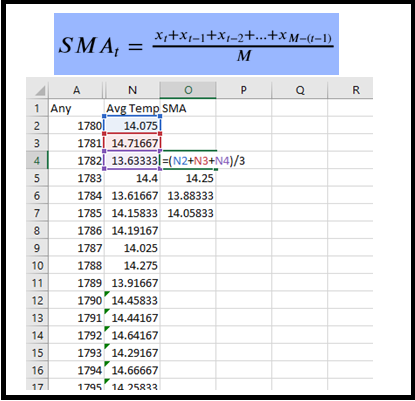

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
df_temperature = pd.read_csv('temperatures.csv', encoding='utf-8')
df_temperature.head()

In [ ]:
df_temperature.info()

In [ ]:
df_temperature.set_index('Year', inplace=True)

In [ ]:
df_temperature['average_temperature'] = df_temperature.mean(axis=1)
# drop unwanted columns and resetting the datafreame
df_temperature = df_temperature[['average_temperature']]
df_temperature.head()

In [ ]:
import matplotlib.pyplot as plt
# drop unwanted columns and resetting the datafreame
df_temperature = df_temperature[['average_temperature']]
plt.plot(df_temperature['average_temperature'])

In [ ]:
# SMA over a period of 10 and 20 years 
df_temperature['SMA_10'] = df_temperature.average_temperature.rolling(10, min_periods=1).mean()
df_temperature['SMA_20'] = df_temperature.average_temperature.rolling(20, min_periods=1).mean()
df_temperature['SMA_5'] = df_temperature.average_temperature.rolling(5, min_periods=1).mean()


# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange','blue']

# # Line plot 
df_temperature.plot(color=colors, linewidth=3, figsize=(12,6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)


# Cumulative Moving Average (CMA)
The CMA is the unweighted mean of past values till the current time.


In [ ]:
# CMA Air temperature
df_temperature['CMA'] = df_temperature.average_temperature.expanding().mean()

# green -Avg Air Temp and Orange -CMA
colors = ['green', 'orange']

# line plot
df_temperature[['average_temperature', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Air Temperature', 'CMA'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

# Exponential Moving Average (EMA)

EMA is mainly used to identify trends and filter out noise. The weight of elements is decreased gradually over time. This means It gives weight to recent data points, not historical ones. Compared with SMA, the EMA is faster to change and more sensitive.

α –>Smoothing Factor.

It has a value between 0,1.

Represents the weighting applied to the very recent period.

Let’s apply the exponential moving averages with a smoothing factor of 0.1 and 0.3 in the given dataset.



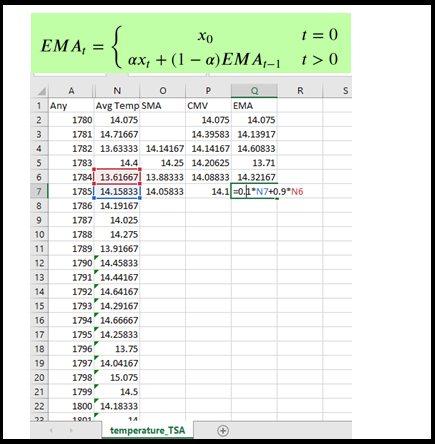

In [ ]:
# EMA Air Temperature

# Let's smoothing factor - 0.1
df_temperature['EMA_0.1'] = df_temperature.average_temperature.ewm(alpha=0.1, adjust=False).mean()

# Let's smoothing factor  - 0.3
df_temperature['EMA_0.3'] = df_temperature.average_temperature.ewm(alpha=0.3, adjust=False).mean()


# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
df_temperature[['average_temperature', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The yearly average air temperature in city', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

# Time Series Analysis in Data Science and Machine Learning
When dealing with TSA in Data Science and Machine Learning, there are multiple model options are available.

In which the Autoregressive–Moving-Average (ARMA) models with [p, d, and q].

    - P==> autoregressive lags
    - q== moving average lags
    - d==> difference in the order
    
Before we get to know about Arima, first, you should understand the below terms better.

        - Auto-Correlation Function (ACF)
        - Partial Auto-Correlation Function (PACF)
        - Auto-Correlation Function (ACF)

ACF indicates how similar a value is within a given time series and the previous value. (OR) It measures the degree of the similarity between a given time series and the lagged version of that time series at the various intervals we observed.

<b>Python Statsmodels library calculates autocorrelation. It identifies a set of trends in the given dataset and the influence of former observed values on the currently observed values.</b>

## Partial Auto-Correlation (PACF)
PACF is similar to Auto-Correlation Function and is a little challenging to understand. It always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series.



In [ ]:
plot_acf(df_temperature['average_temperature'])
plt.show()

plot_acf(df_temperature['average_temperature'], lags=30)
plt.show()

# Observation

The previous temperature influences the current temperature, but the significance of that influence decreases and slightly increases from the above visualization along with the temperature with regular time intervals.

# Types of Auto-Correlation

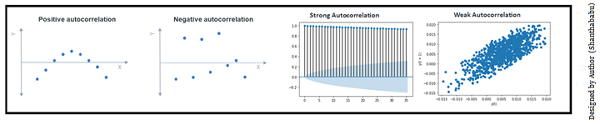

# Interpret ACF and PACF Plots
ACF	PACF	Perfect ML -Model
Plot declines gradually	Plot drops instantly	Auto Regressive model.
Plot drops instantly	Plot declines gradually	Moving Average model
Plot decline gradually	Plot Decline gradually	ARMA
Plot drop instantly	Plot drop instantly	You wouldn’t perform any model
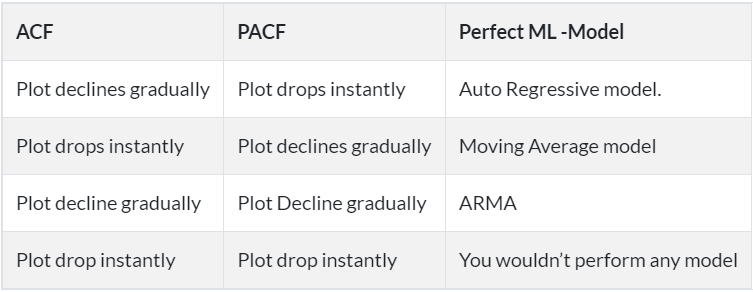

####  Remember that both ACF and PACF require stationary time series for analysis.

# What Is an Auto-Regressive Model?

An auto-regressive model is a simple model that predicts future performance based on past performance. 
It is mainly used for forecasting when there is some correlation between values in a given time series and those that precede and succeed (back and forth).


An AR is a Linear Regression model that uses lagged variables as input. 
By indicating the input, the Linear Regression model can be easily built using the scikit-learn library. 
Statsmodels library provides autoregression model-specific functions where you must specify an appropriate lag value and train the model.
It is provided in the AutoTeg class to get the results using simple steps.


 - Creating the model AutoReg()
 - Call fit() to train it on our dataset.
 - Returns an AutoRegResults object.

Once fit, make a prediction by calling the predict () function
The equation for the AR model (Let’s compare Y=mX+c)

             <b>Yt =C+b1 Yt-1+ b2 Yt-2+……+ bp Yt-p+ Ert</b>

### Key Parameters

        - p=past values
        - Yt=Function of different past values
        - Ert=errors in time
        - C=intercept

Lets’s check whether the given data set or time series is random or not.

In [ ]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df_temperature,lag=30)
pyplot.show()

# Observation

it looks random and scattered or unscattered?


# Implementation of Auto-Regressive Model

In [ ]:
#import libraries
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load csv as dataset
#series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset for test and training
X = df_temperature.values


In [ ]:
train, test = X[1:len(X)-7], X[len(X)-7:]

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
# import matplotlib.pylot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Read the AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv',index_col ='Month',parse_dates = True)

In [ ]:
# Print the first five rows of the dataset
airline.head()

# https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html

In [ ]:
# ETS Decomposition
result = seasonal_decompose(airline['Passengers'],model ='multiplicative')

In [ ]:
# ETS plot
result.plot()

# ARIMA Model for Time Series Forecasting


#### ARIMA stands for autoregressive integrated moving average model and is specified by three order parameters: (p, d, q).


AR(p) Autoregression:
    A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.

I(d) Integration 
    Uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.

MA(q) Moving Average 
    A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.


# Types of ARIMA Model

ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
    
SARIMA:Seasonal ARIMA
    
SARIMAX:Seasonal ARIMA with exogenous variables
    
Pyramid Auto-ARIMA

The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

In [ ]:
# To install the library
!conda install -c conda-forge pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12,
                         start_P = 0, 
                         seasonal = True,
                         d = None, 
                         D = 1, 
                         trace = True,
                         error_action ='ignore',   # we don't want to know if an order does not work
                         suppress_warnings = True,  # we don't want convergence warnings
                         stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary() 